In [26]:
%pylab --no-import-all
%matplotlib inline
import seaborn as sns
import sys
import pandas as pd
from ipywidgets import widgets
from IPython.display import Markdown, display, clear_output, Audio
import os
from os.path import join, isdir
from glob import iglob
import json
from pprint import pformat
import utils
import pickle
import io
import base64
from scipy.io import wavfile
import birdsonganalysis as bsa

sys.path.append('../model')

from song_model import SongModel

sns.set_palette('colorblind')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [36]:
all_path = "../model/res/diversity_170518_165814/seed{}+big_ba+on_alpha_silence_beta+prior_amp_entropy+super_slow_dev+500_replay+15_conc+3_day_conc+500_diversity_th"

In [37]:
songlogs = dict()
for seed in range(40):
    path = all_path.format(seed)
    try:
        with open(join(path, 'data.pkl'), 'rb') as f:
            songlogs[seed] = pickle.load(f)
    except FileNotFoundError:
        pass

rds = dict()
for k, songlog in songlogs.items():
    root_data = [item[1] for item in songlog if item[0] == 'root']
    rds[k] = pd.DataFrame(root_data)

In [38]:
scores = []
for k, rd in rds.items():
    scores.append(rd.iloc[-1]['scores'].min())

In [39]:
from scipy import stats

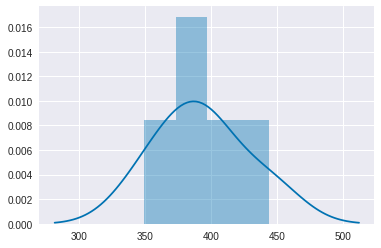

In [40]:
sns.distplot(scores)

In [41]:
stats.ttest_1samp(scores, 437.164164329)

Ttest_1sampResult(statistic=-2.8210369850930221, pvalue=0.047777767144041992)

In [50]:
all_path_less_rep = "../model/res/diversity_170518_165814/seed{}+big_ba+on_alpha_silence_beta+prior_amp_entropy+super_slow_dev+50_replay+50_conc+3_day_conc+500_diversity_th"

songlogs_less_rep = dict()
for seed in range(40):
    path = all_path_less_rep.format(seed)
    try:
        with open(join(path, 'data.pkl'), 'rb') as f:
            songlogs_less_rep[seed] = pickle.load(f)
    except FileNotFoundError:
        pass

rds_less_rep = dict()
for k, songlog in songlogs_less_rep.items():
    root_data = [item[1] for item in songlog if item[0] == 'root']
    rds_less_rep[k] = pd.DataFrame(root_data)
    
scores_less_rep = []
for k, rd in rds_less_rep.items():
    scores_less_rep.append(rd.iloc[-1]['scores'].min())


5
5


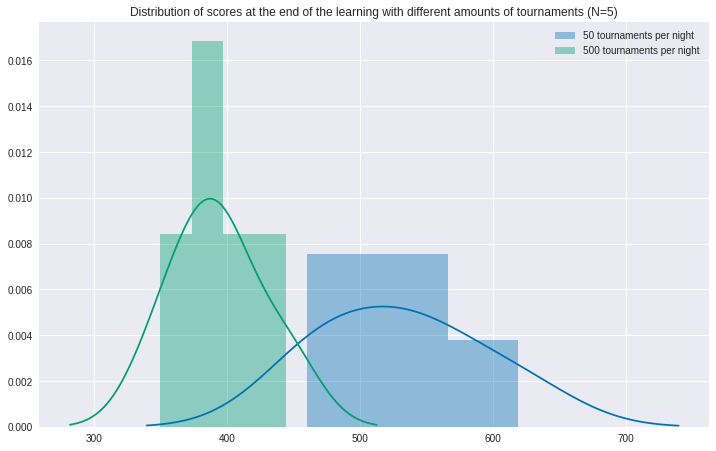

In [64]:
plt.figure(figsize=(12, 12/1.61))
sns.distplot(scores_less_rep, label="50 tournaments per night")
sns.distplot(scores, label="500 tournaments per night")
plt.legend()
plt.title("Distribution of scores at the end of the learning with different amounts of tournaments (N=5)")
print(len(scores_less_rep))
print(len(scores))

In [59]:
stats.ttest_ind(scores_less_rep, scores)

Ttest_indResult(statistic=4.3128068475592434, pvalue=0.0025708986563403322)

In [ ]:
        fig = plt.figure(figsize=self.figsize)
        ax = fig.gca()
        try:
            ax = draw_learning_curve(self.rd[i], ax)
        except Exception as e:
            print(e)
        else:
            sr, synth = wavfile.read('../data/{}_out.wav'.format(
                basename(self.conf[i]['tutor']).split('.')[0]))

            # Do compute score on BA synth only on syllables
            amp = bsa.song_amplitude(synth, 256, 40, 1024)
            sort_amp = np.sort(amp)
            sort_amp = sort_amp[len(sort_amp)//10:]  # discard too low values
            i_max_diff = np.argmax(_running_mean(np.diff(sort_amp), 100))
            threshold = sort_amp[i_max_diff]

            sr, tutor = wavfile.read(join(self.run_paths[i], 'tutor.wav'))
            msynth = bsa_measure(synth, 44100, coefs=self.conf[i]['coefs'])
            mtutor = bsa_measure(tutor, 44100, coefs=self.conf[i]['coefs'])
            score = np.linalg.norm(msynth[amp > threshold] - mtutor[amp > threshold]) / np.sum(amp > threshold) * len(amp)
            ax.axhline(score, color="orange", label="Boari et al. synth error")
            ax.legend()
        finally:
            fig.savefig('learning_curve_{}.pdf'.format(i), dpi=300)
            plt.close(fig)
        return plot_to_html(fig)